In [1]:
# Check kernel
print("Kernel is ready.")

Kernel is ready.


# Histogram Visualization

In [ ]:
import os
import pandas as pd

# 設定資料夾路徑
folder_path = 'D:/test/SAG_green_demo_board/B_csv/'

# 列出資料夾中的所有檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 用來儲存所有資料框 (DataFrame) 的列表
data_frames = []

# 逐一讀取每個 CSV 檔案
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    data_frames.append(df)

# 合併所有資料框
all_data = pd.concat(data_frames, ignore_index=True)

# 顯示合併後的資料
print(all_data)


In [ ]:
import os
import pandas as pd

# 設定資料夾路徑
folder_path = 'D:/test/SAG_green_demo_board/B_csv/'

# 列出資料夾中的所有檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 用來儲存每個檔案的最大 count 值
max_counts = []

# 逐一讀取每個 CSV 檔案
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    
    # 確保資料中包含 'count' 欄位
    if 'Count' in df.columns:
        max_count = df['Count'].max()  # 找出 'count' 欄位的最大值
        max_counts.append((file_name, max_count))  # 儲存檔案名稱與對應的最大值
    else:
        print(f"檔案 {file_name} 中找不到 'Count' 欄位。")

# 顯示每個檔案的最大 count 值
for file_name, max_count in max_counts:
    print(f"檔案 {file_name} 的最大 Count 值是: {max_count}")


In [ ]:
import os
import pandas as pd

# 設定資料夾路徑
folder_path = 'D:/test/SAG_green_demo_board/B_csv/'

# 列出資料夾中的所有檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 用來儲存每個檔案的最大 count 值及其檔案名稱
max_counts = []
file_names_for_max_count = []

# 逐一讀取每個 CSV 檔案
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    
    # 確保資料中包含 'Count' 欄位
    if 'Count' in df.columns:
        max_count = df['Count'].max()  # 找出 'Count' 欄位的最大值
        max_counts.append(max_count)  # 儲存最大值
        file_names_for_max_count.append(file_name)  # 儲存對應檔案名稱
    else:
        print(f"檔案 {file_name} 中找不到 'Count' 欄位。")

# 找出最大值和最小值
if max_counts:
    overall_max = max(max_counts)  # 最大值
    overall_min = min(max_counts)  # 最小值

    # 找出最大值所在的檔案
    max_index = max_counts.index(overall_max)
    file_with_max_count = file_names_for_max_count[max_index]

    # 找出最小值所在的檔案
    min_index = max_counts.index(overall_min)
    file_with_min_count = file_names_for_max_count[min_index]

    # 顯示結果
    print(f"所有檔案中的最大 Count 值是: {overall_max}，來自檔案: {file_with_max_count}")
    print(f"所有檔案中的最小 Count 值是: {overall_min}，來自檔案: {file_with_min_count}")
else:
    print("沒有找到任何有效的 'Count' 欄位。")


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv

# 設定資料夾路徑
folder_path = 'D:/test/SAG_green_demo_board/B_csv/'

# 列出資料夾中的所有檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 用來儲存每個檔案的最大 count 值及其檔案名稱
max_counts = []
file_names_for_max_count = []

# 逐一讀取每個 CSV 檔案
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    
    # 確保資料中包含 'Count' 欄位
    if 'Count' in df.columns:
        max_count = df['Count'].max()  # 找出 'Count' 欄位的最大值
        max_counts.append(max_count)  # 儲存最大值
        file_names_for_max_count.append(file_name)  # 儲存對應檔案名稱
    else:
        print(f"檔案 {file_name} 中找不到 'Count' 欄位。")

# 繪製折線圖
if max_counts:
    # 設定圖表
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(max_counts) + 1), max_counts, linestyle='-', color='b')

    # 設定標題與軸標籤
    plt.title('Max_count for each Files_index')
    plt.xlabel('Files_index')
    plt.ylabel('Max_count')

    # 顯示圖表
    plt.tight_layout()
    plt.show()

else:
    print("沒有找到任何有效的 'Count' 欄位。")


# Laplacian Variance

In [ ]:
import cv2
import os
import numpy as np
import csv

def calculate_laplacian_variance(image_path):
    # 讀取影像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"無法讀取影像: {image_path}")
        return None
    
    # 計算 Laplacian，並計算 Laplacian 的方差
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()
    return variance

def process_images_in_folder(folder_path):
    # 取得資料夾內所有影像檔案
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # 計算每張影像的 Laplacian Variance
    variances = []
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        variance = calculate_laplacian_variance(image_path)
        if variance is not None:
            variances.append([image_file, variance])
    
    return variances

def write_variances_to_csv(variances, output_csv):
    # 寫入 CSV 檔案
    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Image Name", "Laplacian Variance"])  # 寫入標題行
        writer.writerows(variances)  # 寫入數據

# 需要處理的資料夾路徑
# folder_path = 'D:/test/SAG_green_demo_board/B'  # 替換成你的資料夾路徑
folder_path = 'D:/tsne_analysis/image/B'

# 計算並取得 Laplacian Variance
variances = process_images_in_folder(folder_path)

# 將結果寫入 CSV 檔案
output_csv = 'Laplacian_Variance.csv'
write_variances_to_csv(variances, output_csv)

print(f"結果已儲存至 {output_csv}")


# K-Means(Laplacian Variance)

In [ ]:
import cv2
import os
import numpy as np
import csv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def calculate_laplacian_variance(image_path):
    # 讀取影像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"無法讀取影像: {image_path}")
        return None
    
    # 計算 Laplacian，並計算 Laplacian 的方差
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()
    return variance

def process_images_in_folder(folder_path):
    # 取得資料夾內所有影像檔案
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # 計算每張影像的 Laplacian Variance
    variances = []
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        variance = calculate_laplacian_variance(image_path)
        if variance is not None:
            variances.append([image_file, variance])
    
    return variances

def apply_kmeans_to_variances(variances, num_clusters=3):
    # 提取 Laplacian Variance 的數據
    data = np.array([v[1] for v in variances]).reshape(-1, 1)

    # 使用 K-means 算法將 Laplacian Variance 分為 2 類
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(data)

    # 把每個影像和其對應的類別標註
    for i in range(len(variances)):
        variances[i].append(labels[i])
    
    return variances, kmeans

def write_variances_to_csv(variances, output_csv):
    # 寫入 CSV 檔案
    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Image Name", "Laplacian Variance", "Cluster Label"])  # 寫入標題行
        writer.writerows(variances)  # 寫入數據

# 需要處理的資料夾路徑
folder_path = 'D:/tsne_analysis/image/B'

# 計算並取得 Laplacian Variance
variances = process_images_in_folder(folder_path)

# 使用 K-means 分類 Laplacian Variance
variances, kmeans = apply_kmeans_to_variances(variances)

# 將結果寫入 CSV 檔案
# output_csv = 'Laplacian_Variance_with_clusters.csv'
# write_variances_to_csv(variances, output_csv)
# print(f"結果已儲存至 {output_csv}")

# 可視化 K-means 結果（選擇性）
data = np.array([v[1] for v in variances]).reshape(-1, 1)
plt.scatter(data, np.zeros_like(data), c=kmeans.labels_, cmap='viridis', s=50)
plt.title("K-means Clustering of Laplacian Variance")
plt.xlabel("Laplacian Variance")
plt.show()


# K-Means(Laplacian Variance & Image Size)

In [ ]:
import cv2
import os
import numpy as np
import csv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def calculate_laplacian_variance(image_path):
    # 讀取影像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"無法讀取影像: {image_path}")
        return None
    
    # 計算 Laplacian，並計算 Laplacian 的方差
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()
    return variance

def process_images_in_folder(folder_path):
    # 取得資料夾內所有影像檔案
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # 計算每張影像的 Laplacian Variance 和影像大小（寬度 * 高度）
    features = []
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        
        # 計算 Laplacian Variance
        variance = calculate_laplacian_variance(image_path)
        if variance is None:
            continue
        
        # 取得影像尺寸 (寬度 * 高度)
        image = cv2.imread(image_path)
        height, width = image.shape[:2]
        size = width * height  # 使用圖像的寬高積作為大小指標
        
        features.append([image_file, variance, size])
    
    return features

def apply_kmeans_to_features(features, num_clusters=3):
    # 提取 Laplacian Variance 和 Image Size 作為特徵
    data = np.array([[f[1], f[2]] for f in features])  # 以 Laplacian Variance 和 Image Size 作為特徵

    # 使用 K-means 算法將特徵分為多個類別
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(data)

    # 把每個影像和其對應的類別標註
    for i in range(len(features)):
        features[i].append(labels[i])
    
    return features, kmeans, data

def write_features_to_csv(features, output_csv):
    # 寫入 CSV 檔案
    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Image Name", "Laplacian Variance", "Image Size", "Cluster Label"])  # 寫入標題行
        writer.writerows(features)  # 寫入數據

# 需要處理的資料夾路徑
folder_path = 'D:/tsne_analysis/image/B'

# 計算並取得影像特徵
features = process_images_in_folder(folder_path)

# 使用 K-means 分類 Laplacian Variance 和 Image Size
features, kmeans, data = apply_kmeans_to_features(features)

# 將結果寫入 CSV 檔案
# output_csv = 'Laplacian_Variance_and_Size_with_clusters.csv'
# write_features_to_csv(features, output_csv)
# print(f"結果已儲存至 {output_csv}")

# 可視化 K-means 結果（Laplacian Variance 和 Image Size 在 2D 空間中）
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title("K-means Clustering of Laplacian Variance and Image Size")
plt.xlabel("Laplacian Variance")
plt.ylabel


# 12978 Images

In [ ]:
import cv2
import os
import numpy as np
import csv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def calculate_laplacian_variance(image_path):
    # 讀取影像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"無法讀取影像: {image_path}")
        return None
    
    # 計算 Laplacian，並計算 Laplacian 的方差
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()
    return variance

def process_images_in_folder(folder_path):
    # 取得資料夾內所有影像檔案
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # 計算每張影像的 Laplacian Variance
    variances = []
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        variance = calculate_laplacian_variance(image_path)
        if variance is not None:
            variances.append([image_file, variance])
    
    return variances

def apply_kmeans_to_variances(variances, num_clusters=5):
    # 提取 Laplacian Variance 的數據
    data = np.array([v[1] for v in variances]).reshape(-1, 1)

    # 使用 K-means 算法將 Laplacian Variance 分為 2 類
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(data)

    # 把每個影像和其對應的類別標註
    for i in range(len(variances)):
        variances[i].append(labels[i])
    
    return variances, kmeans

def calculate_cluster_boundaries(variances, kmeans):
    # 根據 K-means 聚類的標籤來計算每個聚類的 Laplacian Variance 邊界（最小值和最大值）
    labels = kmeans.labels_
    
    # 創建一個字典來存儲每個聚類的 Laplacian Variance 範圍
    cluster_boundaries = {}

    for i in range(len(variances)):
        image_file, variance, cluster_label = variances[i]
        if cluster_label not in cluster_boundaries:
            cluster_boundaries[cluster_label] = {'min': variance, 'max': variance}
        else:
            cluster_boundaries[cluster_label]['min'] = min(cluster_boundaries[cluster_label]['min'], variance)
            cluster_boundaries[cluster_label]['max'] = max(cluster_boundaries[cluster_label]['max'], variance)

    # 輸出每個聚類的邊界
    for cluster_label, boundary in cluster_boundaries.items():
        print(f"Cluster {cluster_label}: Min Laplacian Variance = {boundary['min']}, Max Laplacian Variance = {boundary['max']}")

    return cluster_boundaries

# 假設 variances 已經包含了所有影像的 Laplacian Variance 和其聚類標籤
cluster_boundaries = calculate_cluster_boundaries(variances, kmeans)

def write_variances_to_csv(variances, output_csv):
    # 寫入 CSV 檔案
    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Image Name", "Laplacian Variance", "Cluster Label"])  # 寫入標題行
        writer.writerows(variances)  # 寫入數據

# 需要處理的資料夾路徑
folder_path = 'D:/test/SAG_green_demo_board/B'

# 計算並取得 Laplacian Variance
variances = process_images_in_folder(folder_path)

# 使用 K-means 分類 Laplacian Variance
variances, kmeans = apply_kmeans_to_variances(variances)

# 將結果寫入 CSV 檔案
output_csv = 'Laplacian_Variance_with_clusters_12978.csv'
write_variances_to_csv(variances, output_csv)
print(f"結果已儲存至 {output_csv}")

# 可視化 K-means 結果（選擇性）
data = np.array([v[1] for v in variances]).reshape(-1, 1)
plt.scatter(data, np.zeros_like(data), c=kmeans.labels_, cmap='viridis', s=50)
plt.title("K-means Clustering of Laplacian Variance")
plt.xlabel("Laplacian Variance")
plt.show()

# 顯示每個聚類的中心（即每個聚類的 Laplacian Variance 平均值）
print("K-means Cluster Centers (Laplacian Variance):")
print(kmeans.cluster_centers_)


# K-Means: Square(10534), Circle(1684), Rect(760)

In [ ]:
import cv2
import os
import numpy as np
import csv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def calculate_laplacian_variance(image_path):
    # 讀取影像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"無法讀取影像: {image_path}")
        return None
    
    # 計算 Laplacian，並計算 Laplacian 的方差
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()
    return variance

def process_images_in_folder(folder_path):
    # 取得資料夾內所有影像檔案
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # 計算每張影像的 Laplacian Variance
    variances = []
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        variance = calculate_laplacian_variance(image_path)
        if variance is not None:
            variances.append([image_file, variance])
    
    return variances

def apply_kmeans_to_variances(variances, num_clusters=5):
    # 提取 Laplacian Variance 的數據
    data = np.array([v[1] for v in variances]).reshape(-1, 1)

    # 使用 K-means 算法將 Laplacian Variance 分為 2 類
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(data)

    # 把每個影像和其對應的類別標註
    for i in range(len(variances)):
        variances[i].append(labels[i])
    
    return variances, kmeans

def calculate_cluster_boundaries(variances, kmeans):
    # 根據 K-means 聚類的標籤來計算每個聚類的 Laplacian Variance 邊界（最小值和最大值）
    labels = kmeans.labels_
    
    # 創建一個字典來存儲每個聚類的 Laplacian Variance 範圍
    cluster_boundaries = {}

    for i in range(len(variances)):
        image_file, variance, cluster_label = variances[i]
        if cluster_label not in cluster_boundaries:
            cluster_boundaries[cluster_label] = {'min': variance, 'max': variance}
        else:
            cluster_boundaries[cluster_label]['min'] = min(cluster_boundaries[cluster_label]['min'], variance)
            cluster_boundaries[cluster_label]['max'] = max(cluster_boundaries[cluster_label]['max'], variance)

    # 輸出每個聚類的邊界，並將 Laplacian Variance 保留到小數點後兩位
    for cluster_label, boundary in cluster_boundaries.items():
        print(f"Cluster {cluster_label}: Min Laplacian Variance = {round(boundary['min'], 2)}, Max Laplacian Variance = {round(boundary['max'], 2)}")

    return cluster_boundaries

# 需要處理的資料夾路徑
folder_path = 'D:/test/SAG_green_demo_board/KMeans/B_circle'

# 計算並取得 Laplacian Variance
variances = process_images_in_folder(folder_path)

# 使用 K-means 分類 Laplacian Variance
variances, kmeans = apply_kmeans_to_variances(variances)

# 計算聚類的邊界
cluster_boundaries = calculate_cluster_boundaries(variances, kmeans)

# 可視化 K-means 結果（選擇性）
data = np.array([v[1] for v in variances]).reshape(-1, 1)
plt.scatter(data, np.zeros_like(data), c=kmeans.labels_, cmap='viridis', s=50)
plt.title("K-means Clustering of Laplacian Variance")
plt.xlabel("Laplacian Variance")
plt.show()

# 顯示每個聚類的中心（即每個聚類的 Laplacian Variance 平均值）
print("K-means Cluster Centers (Laplacian Variance):")
print(np.round(kmeans.cluster_centers_, 2))

# 如果需要，可以將結果寫入 CSV 文件
output_csv = 'Laplacian_Variance_with_clusters_circle.csv'
write_variances_to_csv(variances, output_csv)
print(f"結果已儲存至 {output_csv}")


# Peak Valley Analysis

In [ ]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# 讀取CSV檔
df = pd.read_csv('D:/test/SAG_green_demo_board/B_csv_analysis/UT4_1_107_B.csv')

# 假設CSV檔中有兩欄資料，一欄是灰階值，另一欄是對應的數量
intensities = df['Intensity'].values  # 灰階值
counts = df['Count'].values      # 數量

# 將數據轉換為numpy陣列
intensities = np.array(intensities)
counts = np.array(counts)

# 在指定範圍內尋找波峰
def find_peak_in_range(intensities, counts, start, end):
    mask = (intensities >= start) & (intensities <= end)
    peak_index = np.argmax(counts[mask])
    peak_intensity = intensities[mask][peak_index]
    peak_count = counts[mask][peak_index]
    return peak_intensity, peak_count

# 在兩個範圍內尋找波峰
peak1_intensity, peak1_count = find_peak_in_range(intensities, counts, 0, 50)
peak2_intensity, peak2_count = find_peak_in_range(intensities, counts, 60, 110)

# 繪製圖表
plt.figure(figsize=(12, 6))
plt.plot(intensities, counts, 'b-', label='Intensity Distribution')
plt.plot(peak1_intensity, peak1_count, 'ro', label=f'Peak 1 ({peak1_intensity}, {peak1_count})')
plt.plot(peak2_intensity, peak2_count, 'go', label=f'Peak 2 ({peak2_intensity}, {peak2_count})')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Intensity Distribution with Peaks')
plt.legend()
plt.grid(True)

# 輸出結果
print(f"First peak (0-50): Intensity = {peak1_intensity}, Count = {peak1_count}")
print(f"Second peak (60-110): Intensity = {peak2_intensity}, Count = {peak2_count}")

# 顯示圖表
plt.show()

# PLR(手動設定線段數)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 定义将数据分成8个区间并进行线性回归的函数
def piecewise_linear_regression(x, y, num_segments):
    breakpoints = np.linspace(0, len(x)-1, num_segments+1, dtype=int)
    segments = []
    model = LinearRegression()
    
    for i in range(num_segments):
        start, end = breakpoints[i], breakpoints[i+1]
        x_segment = x[start:end+1]
        y_segment = y[start:end+1]
        model.fit(x_segment, y_segment)
        segments.append((x_segment, model.predict(x_segment)))
    
    return breakpoints, segments

# 读取文件夹路径
folder_path = 'D:/test/SAG_green_demo_board/B_csv/'  # 更改为你的文件夹路径
output_folder = 'D:/test/SAG_green_demo_board/PLR_8/'  # 保存结果的文件夹路径

# 确保输出文件夹存在
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 遍历文件夹中的所有 CSV 文件
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # 读取 CSV 文件
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        # 假设 CSV 文件中有 'Intensity' 和 'Count' 两列
        intensities = df['Intensity'].values
        counts = df['Count'].values
        
        # 确保数据长度一致
        assert len(intensities) == len(counts), "数据列长度不一致"
        
        # 转换为合适的格式
        x = intensities.reshape(-1, 1)
        y = counts
        
        # 执行线性回归分析
        num_segments = 8  # 设置分段数
        breakpoints, segments = piecewise_linear_regression(x, y, num_segments)
        
        # 合并分段的拟合结果
        x_fit = np.concatenate([segment[0] for segment in segments])
        y_fit = np.concatenate([segment[1] for segment in segments])
        
        # 绘制图表
        plt.plot(x, y, label='Original Data', color='b')  # 原始数据
        plt.plot(x_fit, y_fit, label='Piecewise Linear Regression', color='r')  # 回归线
        for bp in breakpoints:
            plt.axvline(x=x[bp], color='g', linestyle='--')  # 断点标记

        # 设置图表标签和标题
        plt.xlabel('Intensity')
        plt.ylabel('Count')
        plt.title(f'Piecewise Linear Regression: {filename}')
        plt.legend()
        
        # 保存图表
        output_path = os.path.join(output_folder, f'{os.path.splitext(filename)[0]}_regression.png')
        plt.savefig(output_path)
        plt.close()  # 关闭当前图表，准备下一个文件

print("所有图表已保存。")


# PLR(8線段)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 定义将数据分成8个区间并进行线性回归的函数
def piecewise_linear_regression(x, y, num_segments):
    # 计算断点
    breakpoints = np.linspace(0, len(x)-1, num_segments+1, dtype=int)
    segments = []
    piecewise_endpoints = []  # 用于保存每个分段的端点

    # 对每个区间进行线性回归
    model = LinearRegression()
    for i in range(num_segments):
        start, end = breakpoints[i], breakpoints[i+1]
        x_segment = x[start:end+1]
        y_segment = y[start:end+1]
        model.fit(x_segment, y_segment)
        
        # 记录每段的回归线
        segments.append((x_segment, model.predict(x_segment)))
        
        # 保存该段的端点坐标（起始点和结束点）
        piecewise_endpoints.append(((x_segment[0][0], y_segment[0]), (x_segment[-1][0], y_segment[-1])))

    return breakpoints, segments, piecewise_endpoints

# 读取文件夹路径
folder_path = 'D:/test/SAG_green_demo_board/B_csv/'  # 更改为你的文件夹路径
output_folder = 'D:/test/SAG_green_demo_board/PLR_8_single/'  # 保存结果的文件夹路径

# 确保输出文件夹存在
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 遍历文件夹中的所有 CSV 文件
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # 读取 CSV 文件
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        # 假设 CSV 文件中有 'Intensity' 和 'Count' 两列
        intensities = df['Intensity'].values  # 灰阶值
        counts = df['Count'].values      # 数量

        # 确保 'Intensity' 和 'Count' 列的长度一致
        assert len(intensities) == len(counts), "数据列长度不一致"

        # 将数据转换为合适的格式
        x = intensities.reshape(-1, 1)  # 需要将 x 转换为二维数组
        y = counts

        # 使用Piecewise Linear Regression方法得到断点和回归线
        num_segments = 8  # 设定我们要的段数
        breakpoints, segments, piecewise_endpoints = piecewise_linear_regression(x, y, num_segments)

        # 绘制结果
        plt.plot(x, y, label='Original Data', color='b')  # 原始数据

        # 单独绘制每个回归段的线并标记图例
        for i, segment in enumerate(segments, start=1):
            plt.plot(segment[0], segment[1], label=f'Segment {i}', color='r')

        # 设置图表标签和标题
        plt.xlabel('Intensity')
        plt.ylabel('Count')
        plt.title(f'Piecewise Linear Regression: {filename}')
        plt.legend()
        
        # 保存图表
        output_path = os.path.join(output_folder, f'{os.path.splitext(filename)[0]}_regression.png')
        plt.savefig(output_path)
        plt.close()  # 关闭当前图表，准备下一个文件

print("所有图表已保存。")


# PLR(端點連接)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 定义将数据分成8个区间并进行线性回归的函数
def piecewise_linear_regression(x, y, num_segments):
    breakpoints = np.linspace(0, len(x)-1, num_segments+1, dtype=int)
    segments = []
    piecewise_endpoints = []  # 用于保存每个分段的端点

    model = LinearRegression()
    for i in range(num_segments):
        start, end = breakpoints[i], breakpoints[i+1]
        x_segment = x[start:end+1]
        y_segment = y[start:end+1]
        model.fit(x_segment, y_segment)
        
        # 记录每段的回归线
        segments.append((x_segment, model.predict(x_segment)))
        
        # 保存该段的端点坐标（起始点和结束点）
        piecewise_endpoints.append(((x_segment[0][0], y_segment[0]), (x_segment[-1][0], y_segment[-1])))

    return breakpoints, segments, piecewise_endpoints

# 读取文件夹路径
folder_path = 'D:/test/SAG_green_demo_board/B_csv/'  # 更改为你的文件夹路径
output_folder = 'D:/test/SAG_green_demo_board/PLR_endpoints/'  # 保存结果的文件夹路径

# 确保输出文件夹存在
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 遍历文件夹中的所有 CSV 文件
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # 读取 CSV 文件
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        # 假设 CSV 文件中有 'Intensity' 和 'Count' 两列
        intensities = df['Intensity'].values
        counts = df['Count'].values
        
        # 确保数据长度一致
        assert len(intensities) == len(counts), "数据列长度不一致"
        
        # 转换为合适的格式
        x = intensities.reshape(-1, 1)
        y = counts
        
        # 执行线性回归分析
        num_segments = 8  # 设置分段数
        breakpoints, segments, piecewise_endpoints = piecewise_linear_regression(x, y, num_segments)
        
        # 提取端点的坐标
        endpoints_x = []
        endpoints_y = []
        for start_end in piecewise_endpoints:
            endpoints_x.extend([start_end[0][0], start_end[1][0]])  # 获取端点的x值
            endpoints_y.extend([start_end[0][1], start_end[1][1]])  # 获取端点的y值
        
        # 绘制结果：直接连接端点
        plt.plot(x, y, label='Original Data', color='b')  # 原始数据
        plt.plot(endpoints_x, endpoints_y, label='Piecewise Endpoints', color='r', marker='o')  # 连接端点的线
        
        # 设置图表标签和标题
        plt.xlabel('Intensity')
        plt.ylabel('Count')
        plt.title(f'Connecting Endpoints of Piecewise Linear Regression: {filename}')
        plt.legend()
        
        # 保存图表
        output_path = os.path.join(output_folder, f'{os.path.splitext(filename)[0]}_endpoints.png')
        plt.savefig(output_path)
        plt.close()  # 关闭当前图表，准备下一个文件

print("所有图表已保存。")


# PLR(AIC/BIC)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 定义函数计算AIC和BIC
def calculate_aic_bic(x, y, num_segments):
    breakpoints = np.linspace(0, len(x)-1, num_segments+1, dtype=int)
    model = LinearRegression()
    n = len(x)  # 样本大小
    k = 2  # 每个回归段的参数个数（线性回归有2个参数：斜率和截距）
    
    residual_sum_of_squares = 0

    # 对每个区间进行线性回归并计算残差平方和
    for i in range(num_segments):
        start, end = breakpoints[i], breakpoints[i+1]
        x_segment = x[start:end+1]
        y_segment = y[start:end+1]
        model.fit(x_segment, y_segment)
        
        # 计算该段的预测值
        y_pred = model.predict(x_segment)
        residual_sum_of_squares += np.sum((y_segment - y_pred) ** 2)  # 残差平方和

    # 计算 AIC 和 BIC
    aic = n * np.log(residual_sum_of_squares / n) + 2 * k * num_segments
    bic = n * np.log(residual_sum_of_squares / n) + k * num_segments * np.log(n)
    
    return aic, bic

# 读取数据并执行Piecewise回归的函数
def piecewise_linear_regression(x, y, num_segments):
    breakpoints = np.linspace(0, len(x)-1, num_segments+1, dtype=int)
    segments = []
    piecewise_endpoints = []  # 用于保存每个分段的端点

    # 对每个区间进行线性回归
    model = LinearRegression()
    for i in range(num_segments):
        start, end = breakpoints[i], breakpoints[i+1]
        x_segment = x[start:end+1]
        y_segment = y[start:end+1]
        model.fit(x_segment, y_segment)
        
        # 记录每段的回归线
        segments.append((x_segment, model.predict(x_segment)))
        
        # 保存该段的端点坐标（起始点和结束点）
        piecewise_endpoints.append(((x_segment[0][0], y_segment[0]), (x_segment[-1][0], y_segment[-1])))

    return breakpoints, segments, piecewise_endpoints

# 读取文件夹路径
folder_path = 'D:/test/SAG_green_demo_board/B_csv/'  # 更改为你的文件夹路径
output_aic_folder = 'D:/test/SAG_green_demo_board/PLR_AIC/'  # 保存结果的文件夹路径
output_bic_folder = 'D:/test/SAG_green_demo_board/PLR_BIC/'  # 保存结果的文件夹路径

if not os.path.exists(output_aic_folder):
    os.makedirs(output_aic_folder)
    
if not os.path.exists(output_bic_folder):
    os.makedirs(output_bic_folder)

# 遍历文件夹中的所有CSV文件
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # 读取CSV文件
        df = pd.read_csv(os.path.join(folder_path, filename))
        
        intensities = df['Intensity'].values
        counts = df['Count'].values
        
        # 确保 'Intensity' 和 'Count' 列的长度一致
        assert len(intensities) == len(counts), f"数据列长度不一致: {filename}"
        
        # 将数据转换为合适的格式
        x = intensities.reshape(-1, 1)
        y = counts
        
        # 使用AIC和BIC选择最佳分段数
        segment_range = range(2, 21)
        aic_values = []
        bic_values = []
        
        for num_segments in segment_range:
            aic, bic = calculate_aic_bic(x, y, num_segments)
            aic_values.append(aic)
            bic_values.append(bic)

        # 找到具有最小AIC和BIC的分段数
        best_num_segments_aic = segment_range[np.argmin(aic_values)]
        best_num_segments_bic = segment_range[np.argmin(bic_values)]

        # 基于AIC和BIC分别进行Piecewise回归并绘图
        breakpoints_aic, segments_aic, piecewise_endpoints_aic = piecewise_linear_regression(x, y, best_num_segments_aic)
        breakpoints_bic, segments_bic, piecewise_endpoints_bic = piecewise_linear_regression(x, y, best_num_segments_bic)

        # 提取AIC的端点坐标
        endpoints_x_aic = []
        endpoints_y_aic = []
        for start_end in piecewise_endpoints_aic:
            endpoints_x_aic.extend([start_end[0][0], start_end[1][0]])  
            endpoints_y_aic.extend([start_end[0][1], start_end[1][1]])  

        # 提取BIC的端点坐标
        endpoints_x_bic = []
        endpoints_y_bic = []
        for start_end in piecewise_endpoints_bic:
            endpoints_x_bic.extend([start_end[0][0], start_end[1][0]])  
            endpoints_y_bic.extend([start_end[0][1], start_end[1][1]])  

        # 绘制AIC的Piecewise回归结果
        plt.plot(x, y, label='Original Data', color='b')  
        plt.plot(endpoints_x_aic, endpoints_y_aic, label=f'Piecewise (AIC, {best_num_segments_aic} segments)', color='r', marker='o')  
        plt.xlabel('Intensity')
        plt.ylabel('Count')
        plt.title(f'Piecewise Linear Regression based on AIC ({best_num_segments_aic} Segments)')
        plt.legend()

        # 保存到AIC文件夹
        plt.savefig(os.path.join(output_aic_folder, f"PLR_AIC_{filename}.png"))
        plt.close()

        # 绘制BIC的Piecewise回归结果
        plt.plot(x, y, label='Original Data', color='b')  
        plt.plot(endpoints_x_bic, endpoints_y_bic, label=f'Piecewise (BIC, {best_num_segments_bic} segments)', color='g', marker='o')  
        plt.xlabel('Intensity')
        plt.ylabel('Count')
        plt.title(f'Piecewise Linear Regression based on BIC ({best_num_segments_bic} Segments)')
        plt.legend()

        # 保存到BIC文件夹
        plt.savefig(os.path.join(output_bic_folder, f"PLR_BIC_{filename}.png"))
        plt.close()


# 記錄最小分段數(AIC/BIC)

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 定义函数计算AIC和BIC
def calculate_aic_bic(x, y, num_segments):
    breakpoints = np.linspace(0, len(x)-1, num_segments+1, dtype=int)
    model = LinearRegression()
    n = len(x)  # 样本大小
    k = 2  # 每个回归段的参数个数（线性回归有2个参数：斜率和截距）  
    residual_sum_of_squares = 0

    # 对每个区间进行线性回归并计算残差平方和
    for i in range(num_segments):
        start, end = breakpoints[i], breakpoints[i+1]
        x_segment = x[start:end+1]
        y_segment = y[start:end+1]
        model.fit(x_segment, y_segment)
        
        # 计算该段的预测值
        y_pred = model.predict(x_segment)
        residual_sum_of_squares += np.sum((y_segment - y_pred) ** 2)  # 残差平方和

    # 计算 AIC 和 BIC
    aic = n * np.log(residual_sum_of_squares / n) + 2 * k * num_segments
    bic = n * np.log(residual_sum_of_squares / n) + k * num_segments * np.log(n)
    
    return aic, bic

# 读取文件夹路径
folder_path = 'D:/test/SAG_green_demo_board/B_csv/'  # 更改为你的文件夹路径
output_csv_folder = 'D:/test/SAG_green_demo_board/'  # 保存结果的文件夹路径

# 初始化字典来存储AIC和BIC的最小分段数
aic_results = {}
bic_results = {}

if not os.path.exists(output_csv_folder):
    os.makedirs(output_csv_folder)

# 遍历文件夹中的所有CSV文件
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # 读取CSV文件
        df = pd.read_csv(os.path.join(folder_path, filename))
        
        intensities = df['Intensity'].values
        counts = df['Count'].values
        
        # 确保 'Intensity' 和 'Count' 列的长度一致
        assert len(intensities) == len(counts), f"数据列长度不一致: {filename}"
        
        # 将数据转换为合适的格式
        x = intensities.reshape(-1, 1)
        y = counts
        
        # 使用AIC和BIC选择最佳分段数
        segment_range = range(2, 21)
        aic_values = []
        bic_values = []
        
        for num_segments in segment_range:
            aic, bic = calculate_aic_bic(x, y, num_segments)
            aic_values.append(aic)
            bic_values.append(bic)

        # 找到具有最小AIC和BIC的分段数
        best_num_segments_aic = segment_range[np.argmin(aic_values)]
        best_num_segments_bic = segment_range[np.argmin(bic_values)]

        # 保存AIC和BIC的最小分段数
        aic_results[filename] = best_num_segments_aic
        bic_results[filename] = best_num_segments_bic

# 将AIC和BIC的最小分段数保存到CSV文件
aic_df = pd.DataFrame(list(aic_results.items()), columns=['Filename', 'Best_Num_Segments_AIC'])
bic_df = pd.DataFrame(list(bic_results.items()), columns=['Filename', 'Best_Num_Segments_BIC'])

aic_df.to_csv(os.path.join(output_csv_folder, 'AIC.csv'), index=False)
bic_df.to_csv(os.path.join(output_csv_folder, 'BIC.csv'), index=False)


# 計算PLR分段斜率(AIC)

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Define function to calculate AIC and slopes of each segment
def calculate_aic(x, y, num_segments):
    breakpoints = np.linspace(0, len(x)-1, num_segments+1, dtype=int)
    model = LinearRegression()
    n = len(x)  # Sample size
    k = 2  # Number of parameters per segment (slope and intercept)
    residual_sum_of_squares = 0
    segment_slopes = []  # To store the slopes of each segment

    # Perform linear regression on each segment and calculate residual sum of squares
    for i in range(num_segments):
        start, end = breakpoints[i], breakpoints[i+1]
        x_segment = x[start:end+1]
        y_segment = y[start:end+1]
        model.fit(x_segment, y_segment)

        # Calculate the predicted values for the segment
        y_pred = model.predict(x_segment)
        residual_sum_of_squares += np.sum((y_segment - y_pred) ** 2)

        # Store the slope of the segment (model.coef_ contains the slope)
        segment_slopes.append(model.coef_[0])

    # Calculate AIC
    aic = n * np.log(residual_sum_of_squares / n) + 2 * k * num_segments
    
    return aic, segment_slopes

# Folder paths
folder_path = 'D:/test/SAG_green_demo_board/B_csv/'  # Change to your folder path
output_csv_folder = 'D:/test/SAG_green_demo_board/'  # Folder to save results

# Initialize dictionary to store results
aic_results = {}
slopes_results = {}

# Create output folder if it doesn't exist
if not os.path.exists(output_csv_folder):
    os.makedirs(output_csv_folder)

# Process each CSV file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Read the CSV file
        df = pd.read_csv(os.path.join(folder_path, filename))
        
        intensities = df['Intensity'].values
        counts = df['Count'].values
        
        # Ensure 'Intensity' and 'Count' columns have the same length
        assert len(intensities) == len(counts), f"Data length mismatch: {filename}"
        
        # Reshape and prepare data
        x = intensities.reshape(-1, 1)
        y = counts
        
        # Find the best segment count using AIC
        segment_range = range(2, 21)
        aic_values = []
        all_segment_slopes = []

        for num_segments in segment_range:
            aic, segment_slopes = calculate_aic(x, y, num_segments)
            aic_values.append(aic)
            all_segment_slopes.append(segment_slopes)

        # Find the best number of segments based on AIC
        best_num_segments_aic = segment_range[np.argmin(aic_values)]

        # Save the best segment count and corresponding slopes
        aic_results[filename] = best_num_segments_aic
        slopes_results[filename] = all_segment_slopes[best_num_segments_aic - 2]  # Using AIC-based best segment count

# Prepare data for saving to AIC.csv
aic_columns = []

# Determine the maximum number of segments (which will define the number of slope columns)
max_segments = 0
for slopes in slopes_results.values():
    max_segments = max(max_segments, len(slopes))

# Prepare data for AIC CSV
for filename in aic_results.keys():
    # Get AIC and slopes for the best number of segments
    best_aic = aic_results[filename]
    slopes = slopes_results[filename]

    # Pad the list with NaN if there are fewer slopes than the maximum number of segments
    padded_slopes = slopes + [np.nan] * (max_segments - len(slopes))
    aic_columns.append([filename, best_aic] + padded_slopes)

# Generate column names for AIC CSV
aic_column_names = ['Filename', 'Best_AIC']
for i in range(1, max_segments + 1):  # Adjust to the max number of segments across all files
    aic_column_names.append(f'Slope_{i}')

# Create DataFrame for AIC
aic_df = pd.DataFrame(aic_columns, columns=aic_column_names)

# Save results to AIC.csv
aic_df.to_csv(os.path.join(output_csv_folder, 'AIC.csv'), index=False)


# 記錄PLR端點斜率(AIC)

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Define function to calculate AIC, slopes, and endpoints for each segment
def calculate_aic_and_slopes(x, y, num_segments):
    breakpoints = np.linspace(0, len(x)-1, num_segments+1, dtype=int)
    model = LinearRegression()
    n = len(x)  # Sample size
    k = 2  # Number of parameters per segment (slope and intercept)
    residual_sum_of_squares = 0
    segment_slopes = []  # To store the slopes of each segment
    piecewise_endpoints = []  # To store the endpoints of each segment

    # Perform linear regression on each segment and calculate residual sum of squares
    for i in range(num_segments):
        start, end = breakpoints[i], breakpoints[i+1]
        x_segment = x[start:end+1]
        y_segment = y[start:end+1]
        model.fit(x_segment, y_segment)

        # Calculate the predicted values for the segment
        y_pred = model.predict(x_segment)
        residual_sum_of_squares += np.sum((y_segment - y_pred) ** 2)

        # Store the endpoints of the segment
        piecewise_endpoints.append([(x_segment[0, 0], y_segment[0]), (x_segment[-1, 0], y_segment[-1])])

    # Calculate AIC
    aic = n * np.log(residual_sum_of_squares / n) + 2 * k * num_segments
    
    return aic, piecewise_endpoints

# Function to calculate slopes from endpoints
def calculate_slopes_from_endpoints(endpoints):
    slopes = []
    for start_end in endpoints:
        # Extract start and end points
        (x1, y1), (x2, y2) = start_end
        if x2 - x1 != 0:  # To avoid division by zero
            slope = (y2 - y1) / (x2 - x1)
        else:
            slope = np.nan  # If x2 == x1, slope is undefined (vertical line)
        slopes.append(slope)
    return slopes

# Folder paths
folder_path = 'D:/test/SAG_green_demo_board/B_csv/'  # Change to your folder path
output_csv_folder = 'D:/test/SAG_green_demo_board/'  # Folder to save results

# Initialize dictionary to store results
aic_results = {}
slopes_results = {}

# Create output folder if it doesn't exist
if not os.path.exists(output_csv_folder):
    os.makedirs(output_csv_folder)

# Process each CSV file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Read the CSV file
        df = pd.read_csv(os.path.join(folder_path, filename))
        
        intensities = df['Intensity'].values
        counts = df['Count'].values
        
        # Ensure 'Intensity' and 'Count' columns have the same length
        assert len(intensities) == len(counts), f"Data length mismatch: {filename}"
        
        # Reshape and prepare data
        x = intensities.reshape(-1, 1)
        y = counts
        
        # Find the best segment count using AIC
        segment_range = range(2, 21)
        aic_values = []
        all_endpoints = []

        for num_segments in segment_range:
            aic, endpoints = calculate_aic_and_slopes(x, y, num_segments)
            aic_values.append(aic)
            all_endpoints.append(endpoints)

        # Find the best number of segments based on AIC
        best_num_segments_aic = segment_range[np.argmin(aic_values)]

        # Save the best segment count, corresponding slopes, and endpoints
        aic_results[filename] = best_num_segments_aic
        best_endpoints = all_endpoints[best_num_segments_aic - 2]  # Using AIC-based best segment count
        slopes_results[filename] = calculate_slopes_from_endpoints(best_endpoints)  # Calculate slopes from endpoints

# Prepare data for saving to AIC.csv
aic_columns = []

# Determine the maximum number of segments (which will define the number of slope columns)
max_segments = 0
for slopes in slopes_results.values():
    max_segments = max(max_segments, len(slopes))

# Prepare data for AIC CSV
for filename in aic_results.keys():
    # Get AIC and slopes for the best number of segments
    best_aic = aic_results[filename]
    slopes = slopes_results[filename]

    # Pad the list with NaN if there are fewer slopes than the maximum number of segments
    padded_slopes = slopes + [np.nan] * (max_segments - len(slopes))
    aic_columns.append([filename, best_aic] + padded_slopes)

# Generate column names for AIC CSV
aic_column_names = ['Filename', 'Best_AIC']
for i in range(1, max_segments + 1):  # Adjust to the max number of segments across all files
    aic_column_names.append(f'Slope_{i}')

# Create DataFrame for AIC
aic_df = pd.DataFrame(aic_columns, columns=aic_column_names)

# Save results to AIC.csv
aic_df.to_csv(os.path.join(output_csv_folder, 'AIC_PLR_endpoints_slope.csv'), index=False)

print("AIC and slopes calculations completed and saved.")


# PLR_AIC(RA、RT、UT)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 定义函数计算AIC
def calculate_aic(x, y, num_segments):
    breakpoints = np.linspace(0, len(x)-1, num_segments+1, dtype=int)
    model = LinearRegression()
    n = len(x)  # 样本大小
    k = 2  # 每个回归段的参数个数（线性回归有2个参数：斜率和截距）
    
    residual_sum_of_squares = 0

    # 对每个区间进行线性回归并计算残差平方和
    for i in range(num_segments):
        start, end = breakpoints[i], breakpoints[i+1]
        x_segment = x[start:end+1]
        y_segment = y[start:end+1]
        model.fit(x_segment, y_segment)
        
        # 计算该段的预测值
        y_pred = model.predict(x_segment)
        residual_sum_of_squares += np.sum((y_segment - y_pred) ** 2)  # 残差平方和

    # 计算 AIC
    aic = n * np.log(residual_sum_of_squares / n) + 2 * k * num_segments
    
    return aic

# 读取数据并执行Piecewise回归的函数
def piecewise_linear_regression(x, y, num_segments):
    breakpoints = np.linspace(0, len(x)-1, num_segments+1, dtype=int)
    segments = []
    piecewise_endpoints = []  # 用于保存每个分段的端点

    # 对每个区间进行线性回归
    model = LinearRegression()
    for i in range(num_segments):
        start, end = breakpoints[i], breakpoints[i+1]
        x_segment = x[start:end+1]
        y_segment = y[start:end+1]
        model.fit(x_segment, y_segment)
        
        # 记录每段的回归线
        segments.append((x_segment, model.predict(x_segment)))
        
        # 保存该段的端点坐标（起始点和结束点）
        piecewise_endpoints.append(((x_segment[0][0], y_segment[0]), (x_segment[-1][0], y_segment[-1])))

    return breakpoints, segments, piecewise_endpoints

# 读取文件夹路径
folder_path = 'D:/test/SAG_green_demo_board/B_csv/'  # 更改为你的文件夹路径
output_aic_folder = 'D:/test/SAG_green_demo_board/PLR_AIC_1416/'  # 保存结果的文件夹路径
# folder_path = 'D:/test/SAG_green_demo_board/B_csv_RA/'  # 更改为你的文件夹路径
# output_aic_folder = 'D:/test/SAG_green_demo_board/PLR_RA/'  # 保存结果的文件夹路径
# folder_path = 'D:/test/SAG_green_demo_board/B_csv_RT/'  # 更改为你的文件夹路径
# output_aic_folder = 'D:/test/SAG_green_demo_board/PLR_RT/'  # 保存结果的文件夹路径
# folder_path = 'D:/test/SAG_green_demo_board/B_csv_UT/'  # 更改为你的文件夹路径
# output_aic_folder = 'D:/test/SAG_green_demo_board/PLR_UT/'  # 保存结果的文件夹路径

if not os.path.exists(output_aic_folder):
    os.makedirs(output_aic_folder)

# 遍历文件夹中的所有CSV文件
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # 读取CSV文件
        df = pd.read_csv(os.path.join(folder_path, filename))
        
        intensities = df['Intensity'].values
        counts = df['Count'].values
        
        # 确保 'Intensity' 和 'Count' 列的长度一致
        assert len(intensities) == len(counts), f"数据列长度不一致: {filename}"
        
        # 将数据转换为合适的格式
        x = intensities.reshape(-1, 1)
        y = counts
        
        # 使用AIC选择最佳分段数
        segment_range = range(14, 17)
        aic_values = []
        
        for num_segments in segment_range:
            aic = calculate_aic(x, y, num_segments)
            aic_values.append(aic)

        # 找到具有最小AIC的分段数
        best_num_segments_aic = segment_range[np.argmin(aic_values)]

        # 基于AIC进行Piecewise回归并绘图
        breakpoints_aic, segments_aic, piecewise_endpoints_aic = piecewise_linear_regression(x, y, best_num_segments_aic)

        # 提取AIC的端点坐标
        endpoints_x_aic = []
        endpoints_y_aic = []
        for start_end in piecewise_endpoints_aic:
            endpoints_x_aic.extend([start_end[0][0], start_end[1][0]])  
            endpoints_y_aic.extend([start_end[0][1], start_end[1][1]])   

        # 绘制AIC的Piecewise回归结果
        plt.plot(x, y, label='Original Data', color='b')  
        plt.plot(endpoints_x_aic, endpoints_y_aic, label=f'Piecewise (AIC, {best_num_segments_aic} segments)', color='r', marker='o')  
        plt.xlabel('Intensity')
        plt.ylabel('Count')
        plt.title(f'Piecewise Linear Regression based on AIC ({best_num_segments_aic} Segments)')
        plt.legend()

        # 保存到AIC文件夹，文件名去掉 .csv 后缀
        filename_without_extension = os.path.splitext(filename)[0]  # 去除 .csv 后缀
        plt.savefig(os.path.join(output_aic_folder, f"{filename_without_extension}.png"))
        plt.close()


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 定义函数计算AIC
def calculate_aic(x, y, num_segments):
    breakpoints = np.linspace(0, len(x)-1, num_segments+1, dtype=int)
    model = LinearRegression()
    n = len(x)  # 样本大小
    k = 2  # 每个回归段的参数个数（线性回归有2个参数：斜率和截距）  
    residual_sum_of_squares = 0

    # 对每个区间进行线性回归并计算残差平方和
    for i in range(num_segments):
        start, end = breakpoints[i], breakpoints[i+1]
        x_segment = x[start:end+1]
        y_segment = y[start:end+1]
        model.fit(x_segment, y_segment)
        
        # 计算该段的预测值
        y_pred = model.predict(x_segment)
        residual_sum_of_squares += np.sum((y_segment - y_pred) ** 2)  # 残差平方和

    # 计算 AIC
    aic = n * np.log(residual_sum_of_squares / n) + 2 * k * num_segments
    
    return aic

# 读取文件夹路径
folder_path = 'D:/test/SAG_green_demo_board/B_csv_UT/'  # 更改为你的文件夹路径
output_csv_folder = 'D:/test/SAG_green_demo_board/'  # 保存结果的文件夹路径

# 初始化字典来存储AIC的最小分段数
aic_results = {}

if not os.path.exists(output_csv_folder):
    os.makedirs(output_csv_folder)

# 遍历文件夹中的所有CSV文件
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # 读取CSV文件
        df = pd.read_csv(os.path.join(folder_path, filename))
        
        intensities = df['Intensity'].values
        counts = df['Count'].values
        
        # 确保 'Intensity' 和 'Count' 列的长度一致
        assert len(intensities) == len(counts), f"数据列长度不一致: {filename}"
        
        # 将数据转换为合适的格式
        x = intensities.reshape(-1, 1)
        y = counts
        
        # 使用AIC选择最佳分段数
        segment_range = range(2, 21)
        aic_values = []
        
        for num_segments in segment_range:
            aic = calculate_aic(x, y, num_segments)
            aic_values.append(aic)

        # 找到具有最小AIC的分段数
        best_num_segments_aic = segment_range[np.argmin(aic_values)]

        # 保存AIC的最小分段数
        aic_results[filename] = best_num_segments_aic

# 将AIC的最小分段数保存到CSV文件
aic_df = pd.DataFrame(list(aic_results.items()), columns=['Filename', 'Best_AIC'])

aic_df.to_csv(os.path.join(output_csv_folder, 'AIC_UT.csv'), index=False)


# Padding(補0)

In [ ]:
import os
from PIL import Image

def resize_and_pad(image_path, target_size=(128, 128), padding_color=(0, 0, 0)):
    # 打開圖像
    img = Image.open(image_path)

    # 獲取當前圖像的尺寸
    current_width, current_height = img.size
    
    # 計算縮放比例
    ratio = min(target_size[0] / current_width, target_size[1] / current_height)
    
    # 計算新的尺寸
    new_width = int(current_width * ratio)
    new_height = int(current_height * ratio)
    
    # 縮放圖像
    img_resized = img.resize((new_width, new_height), Image.Resampling.LANCZOS)
    
    # 計算填充的尺寸
    padding_left = (target_size[0] - new_width) // 2
    padding_top = (target_size[1] - new_height) // 2
    padding_right = target_size[0] - new_width - padding_left
    padding_bottom = target_size[1] - new_height - padding_top
    
    # 在圖像周圍添加填充
    img_padded = Image.new("RGB", target_size, padding_color)
    img_padded.paste(img_resized, (padding_left, padding_top))
    
    return img_padded

# 設定資料夾路徑
input_folder = 'D:/Training tool/RGB_DS_WL'  # 來源資料夾
output_folder = 'D:/Training tool/RGB_DS_WL_PADZERO'  # 輸出資料夾

# 如果輸出資料夾不存在，創建它
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 遍歷資料夾中的所有影像檔案
for filename in os.listdir(input_folder):
    # 檢查檔案是否為影像檔案
    if filename.lower().endswith(('.bmp', '.jpg', '.png', '.jpeg', '.tiff', '.gif')):
        input_image_path = os.path.join(input_folder, filename)
        
        # 處理影像
        output_image = resize_and_pad(input_image_path)
        
        # 提取原始檔案名稱和擴展名
        base_name, ext = os.path.splitext(filename)
        
        # 構建新檔案名稱，加上 "_padzero" 後綴
        new_image_path = os.path.join(output_folder, f"{base_name}_padzero{ext}")
        
        # 儲存處理後的影像
        output_image.save(new_image_path)

print("處理完成，所有影像已儲存到:", output_folder)


# Padding(延伸邊界)

In [ ]:
import os
from PIL import Image

def extend_border_to_fill(image, target_size=(128, 128)):
    # 获取当前图像的尺寸
    current_width, current_height = image.size
    
    # 计算缩放比例，使图片最大化填满目标尺寸
    ratio = min(target_size[0] / current_width, target_size[1] / current_height)
    
    # 计算新的尺寸
    new_width = int(current_width * ratio)
    new_height = int(current_height * ratio)
    
    # 缩放图像
    img_resized = image.resize((new_width, new_height), Image.Resampling.LANCZOS)
    
    # 计算填充的尺寸
    padding_left = (target_size[0] - new_width) // 2
    padding_top = (target_size[1] - new_height) // 2
    padding_right = target_size[0] - new_width - padding_left
    padding_bottom = target_size[1] - new_height - padding_top
    
    # 创建背景图片
    img_padded = Image.new("RGB", target_size)
    img_padded.paste(img_resized, (padding_left, padding_top))

    # 获取图像四个角的像素
    top_left = image.getpixel((0, 0))
    top_right = image.getpixel((current_width - 1, 0))
    bottom_left = image.getpixel((0, current_height - 1))
    bottom_right = image.getpixel((current_width - 1, current_height - 1))

    # 扩展上边
    for y in range(padding_top):
        for x in range(target_size[0]):
            if x < padding_left:
                img_padded.putpixel((x, y), top_left)  # 扩展左上角颜色
            elif x >= padding_left + new_width:
                img_padded.putpixel((x, y), top_right)  # 扩展右上角颜色
            else:
                img_padded.putpixel((x, y), image.getpixel((x - padding_left, 0)))  # 上边颜色

    # 扩展下边
    for y in range(padding_top + new_height, target_size[1]):
        for x in range(target_size[0]):
            if x < padding_left:
                img_padded.putpixel((x, y), bottom_left)  # 扩展左下角颜色
            elif x >= padding_left + new_width:
                img_padded.putpixel((x, y), bottom_right)  # 扩展右下角颜色
            else:
                img_padded.putpixel((x, y), image.getpixel((x - padding_left, current_height - 1)))  # 下边颜色

    # 扩展左边
    for x in range(padding_left):
        for y in range(target_size[1]):
            img_padded.putpixel((x, y), top_left)  # 扩展左边颜色

    # 扩展右边
    for x in range(padding_left + new_width, target_size[0]):
        for y in range(target_size[1]):
            img_padded.putpixel((x, y), top_right)  # 扩展右边颜色

    return img_padded

# 设置文件夹路径
input_folder = 'D:/Training tool/RGB_DS_WL'  # 输入文件夹路径
output_folder = 'D:/Training tool/RGB_DS_WL_EXTENDBORDER'  # 输出文件夹路径

# 确保输出文件夹存在
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 遍历文件夹中的所有图像文件
for filename in os.listdir(input_folder):
    # 只处理图像文件
    if filename.lower().endswith(('.bmp', '.jpg', '.jpeg', '.png', '.gif')):
        image_path = os.path.join(input_folder, filename)
        img = Image.open(image_path)
        
        # 处理图像并保存
        output_image = extend_border_to_fill(img)
        
        # 保存处理后的图像
        output_filename = os.path.splitext(filename)[0] + '_extendborder' + os.path.splitext(filename)[1]
        output_path = os.path.join(output_folder, output_filename)
        output_image.save(output_path)

        print(f"Processed and saved: {output_filename}")

print("All images have been processed and saved.")


# 計算延伸邊界的異常影像數

In [ ]:
import os
from PIL import Image

# 設定資料夾路徑
folder_path = "D:/Training tool/RGB_DS_WL_EXTENDBORDER"

# 定義顏色相似度檢查，容忍度設定為30（RGB每個分量的最大差異）
def color_similar(c1, c2, tolerance=30):
    return all(abs(c1[i] - c2[i]) <= tolerance for i in range(3))

# 檢查影像邊界顏色是否一致（或相似）
def check_border_color(image, tolerance=30):
    width, height = image.size

    # 確保影像是128x128
    if width != 128 or height != 128:
        return False
    
    # 讀取影像像素資料
    pixels = image.load()

    # 取得上邊界第一個像素作為參考顏色
    top_left_color = pixels[0, 0]

    # 檢查上邊界
    for x in range(128):
        if not color_similar(pixels[x, 0], top_left_color, tolerance):
            return False
    
    # 檢查下邊界
    for x in range(128):
        if not color_similar(pixels[x, 127], top_left_color, tolerance):
            return False
    
    # 檢查左邊界
    for y in range(128):
        if not color_similar(pixels[0, y], top_left_color, tolerance):
            return False
    
    # 檢查右邊界
    for y in range(128):
        if not color_similar(pixels[127, y], top_left_color, tolerance):
            return False

    return True

# 用來存放符合條件的影像檔案
valid_images = []

# 遍歷資料夾中的所有檔案
for filename in os.listdir(folder_path):
    # 檢查是否為影像檔案（可以根據檔案副檔名過濾）
    if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        # 生成檔案的完整路徑
        image_path = os.path.join(folder_path, filename)
        
        # 讀取影像
        img = Image.open(image_path)
        
        # 檢查影像是否符合條件（128x128 且邊界顏色一致）
        if check_border_color(img, tolerance=30):
            valid_images.append(filename)

# 顯示符合條件的影像檔案
print(f"符合條件的影像有 {len(valid_images)} 張。")


# 灰階轉為RGB顯示

In [ ]:
from PIL import Image

# 開啟影像檔案
image_path = 'D:/AI_inference/Central_Science/DataVisualization/50459++PL2432_1~1_RGB_padzero_label.png'  # 請將此路徑替換為你的影像檔案路徑
image = Image.open(image_path)

# 轉換為灰階
gray_image = image.convert('L')

# 取得影像的像素資料
pixels = gray_image.load()

# 取得影像的尺寸
width, height = gray_image.size

# 創建新的 RGB 圖像
new_image = Image.new("RGB", (width, height))
new_pixels = new_image.load()

# 根據灰階值映射到 RGB
for y in range(height):
    for x in range(width):
        gray_value = pixels[x, y]
        
        # 根據灰階值映射到顏色
        if gray_value == 0:
            new_pixels[x, y] = (255, 0, 0)  # R
        elif gray_value == 1:
            new_pixels[x, y] = (0, 255, 0)  # G
        elif gray_value == 2:
            new_pixels[x, y] = (0, 0, 255)  # B
        elif gray_value == 255:
            new_pixels[x, y] = (255, 255, 255)  # White

# 顯示新的影像
new_image.show()

# 儲存新的影像
new_image.save('D:/AI_inference/Central_Science/DataVisualization/output_image.jpg')


# 灰階轉為RGB顯示 & 計算pixel數

In [ ]:
from PIL import Image

# 開啟影像檔案
image_path = 'D:/AI_inference/Central_Science/DataVisualization/316++11419++PL2432_1~1_RGB_predict.png'  # 請將此路徑替換為你的影像檔案路徑
image = Image.open(image_path)

# 轉換為灰階
gray_image = image.convert('L')

# 取得影像的像素資料
pixels = gray_image.load()

# 取得影像的尺寸
width, height = gray_image.size

# 創建新的 RGB 圖像
new_image = Image.new("RGB", (width, height))
new_pixels = new_image.load()

# 初始化計數變數
red_count = 0
green_count = 0
blue_count = 0
white_count = 0

# 根據灰階值映射到 RGB 並計算顏色數量
for y in range(height):
    for x in range(width):
        gray_value = pixels[x, y]
        
        # 根據灰階值映射到顏色
        if gray_value == 0:
            new_pixels[x, y] = (255, 0, 0)  # R
            red_count += 1  # 累加紅色像素數量
        elif gray_value == 1:
            new_pixels[x, y] = (0, 255, 0)  # G
            green_count += 1  # 累加綠色像素數量
        elif gray_value == 2:
            new_pixels[x, y] = (0, 0, 255)  # B
            blue_count += 1  # 累加藍色像素數量
        elif gray_value == 255:
            new_pixels[x, y] = (255, 255, 255)  # White
            white_count += 1  # 累加白色像素數量

# 顯示新的影像
new_image.show()

# 儲存新的影像
new_image.save('D:/AI_inference/Central_Science/DataVisualization/output_image.jpg')

# 輸出顏色數量
print(f"紅色像素數量: {red_count}")
print(f"綠色像素數量: {green_count}")
print(f"藍色像素數量: {blue_count}")
print(f"白色像素數量: {white_count}")


# 四種內插方法(NN/BiLinear/BiCubic/Area)

In [ ]:
import os
from PIL import Image

def resize_and_pad(image_path, target_size=(128, 128), padding_color=(0, 0, 0), resample_method=Image.Resampling.NEAREST):
    # 打開圖像
    img = Image.open(image_path)

    # 獲取當前圖像的尺寸
    current_width, current_height = img.size
    
    # 計算縮放比例
    ratio = min(target_size[0] / current_width, target_size[1] / current_height)
    
    # 計算新的尺寸
    new_width = int(current_width * ratio)
    new_height = int(current_height * ratio)
    
    # 使用選定的內插方法縮放圖像
    img_resized = img.resize((new_width, new_height), resample_method)
    
    # 計算填充的尺寸
    padding_left = (target_size[0] - new_width) // 2
    padding_top = (target_size[1] - new_height) // 2
    padding_right = target_size[0] - new_width - padding_left
    padding_bottom = target_size[1] - new_height - padding_top
    
    # 在圖像周圍添加填充
    img_padded = Image.new("RGB", target_size, padding_color)
    img_padded.paste(img_resized, (padding_left, padding_top))
    
    return img_padded

# 設定資料夾路徑
input_folder = 'D:/Training tool/RGB_DS_WL'  # 來源資料夾
output_folder = 'D:/Training tool'  # 輸出資料夾

# 如果輸出資料夾不存在，創建它
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 內插方法選擇：NN, Linear, Cubic, LANCZOS
resample_methods = {
    'NN': Image.Resampling.NEAREST,         # Nearest Neighbor
    'Linear': Image.Resampling.BILINEAR,    # Bilinear
    'Cubic': Image.Resampling.BICUBIC,      # Bicubic
    'LANCZOS': Image.Resampling.LANCZOS     # Lanczos
}

# 為每個內插方法創建對應的資料夾
for method_name in resample_methods.keys():
    method_folder = os.path.join(output_folder, method_name)
    if not os.path.exists(method_folder):
        os.makedirs(method_folder)

# 遍歷資料夾中的所有影像檔案
for filename in os.listdir(input_folder):
    # 檢查檔案是否為影像檔案
    if filename.lower().endswith(('.bmp', '.jpg', '.png', '.jpeg', '.tiff', '.gif')):
        input_image_path = os.path.join(input_folder, filename)
        
        # 依次使用不同的內插方法處理影像
        for method_name, resample_method in resample_methods.items():
            # 處理影像
            output_image = resize_and_pad(input_image_path, resample_method=resample_method)
            
            # 提取原始檔案名稱和擴展名
            base_name, ext = os.path.splitext(filename)
            
            # 構建新檔案名稱，加上內插方法名稱後綴
            new_image_path = os.path.join(output_folder, method_name, f"{base_name}_{method_name}{ext}")
            
            # 儲存處理後的影像
            output_image.save(new_image_path)

print("處理完成，所有影像已儲存到:", output_folder)


# 計算內插法運算時間

In [ ]:
import os
import time
from PIL import Image

def resize_and_pad(image_path, target_size=(128, 128), padding_color=(0, 0, 0), resample_method=Image.Resampling.NEAREST):
    """進行影像縮放和填充"""
    # 打開圖像
    img = Image.open(image_path)

    # 獲取當前圖像的尺寸
    current_width, current_height = img.size
    
    # 計算縮放比例
    ratio = min(target_size[0] / current_width, target_size[1] / current_height)
    
    # 計算新的尺寸
    new_width = int(current_width * ratio)
    new_height = int(current_height * ratio)
    
    # 使用選定的內插方法縮放圖像
    img_resized = img.resize((new_width, new_height), resample_method)
    
    # 計算填充的尺寸
    padding_left = (target_size[0] - new_width) // 2
    padding_top = (target_size[1] - new_height) // 2
    padding_right = target_size[0] - new_width - padding_left
    padding_bottom = target_size[1] - new_height - padding_top
    
    # 在圖像周圍添加填充
    img_padded = Image.new("RGB", target_size, padding_color)
    img_padded.paste(img_resized, (padding_left, padding_top))
    
    return img_padded

def process_images(input_folder, output_folder, resample_method, method_name):
    """處理影像並儲存，計算執行時間"""
    # 為每個內插方法創建對應的資料夾
    method_folder = os.path.join(output_folder, method_name)
    if not os.path.exists(method_folder):
        os.makedirs(method_folder)

    start_time = time.time()  # 計時開始

    # 遍歷資料夾中的所有影像檔案
    for filename in os.listdir(input_folder):
        # 檢查檔案是否為影像檔案
        if filename.lower().endswith(('.bmp', '.jpg', '.png', '.jpeg', '.tiff', '.gif')):
            input_image_path = os.path.join(input_folder, filename)
            
            # 處理影像
            output_image = resize_and_pad(input_image_path, resample_method=resample_method)
            
            # 提取原始檔案名稱和擴展名
            base_name, ext = os.path.splitext(filename)
            
            # 構建新檔案名稱，加上內插方法名稱後綴
            new_image_path = os.path.join(method_folder, f"{base_name}_{method_name}{ext}")
            
            # 儲存處理後的影像
            output_image.save(new_image_path)

    end_time = time.time()  # 計時結束
    elapsed_time = end_time - start_time  # 計算時間差
    print(f"內插方法 {method_name} 處理完成，耗時: {elapsed_time:.2f} 秒")

def main():
    input_folder = 'D:/Training tool/RGB_DS_WL'  # 來源資料夾
    output_folder = 'D:/Training tool/00000000000000000000000000000000'  # 輸出資料夾

    # 內插方法選擇：NN, Linear, Cubic, LANCZOS
    resample_methods = {
        'NN': Image.Resampling.NEAREST,         # Nearest Neighbor
        'Linear': Image.Resampling.BILINEAR,    # Bilinear
        'Cubic': Image.Resampling.BICUBIC,      # Bicubic
        'LANCZOS': Image.Resampling.LANCZOS     # Lanczos
    }

    # 將每種內插方法的處理分開執行並計算時間
    for method_name, resample_method in resample_methods.items():
        process_images(input_folder, output_folder, resample_method, method_name)

if __name__ == "__main__":
    main()


# 計算SSIM/PSNR

In [ ]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import csv

def calculate_psnr(img1, img2):
    """計算兩幅圖像的 PSNR"""
    return cv2.PSNR(img1, img2)

def calculate_ssim(img1, img2):
    """計算兩幅圖像的 SSIM"""
    # 轉換為灰度圖像
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    return ssim(img1_gray, img2_gray)

def load_image(image_path):
    """加載圖像並轉換為 numpy 陣列"""
    img = cv2.imread(image_path)
    if img is None:
        print(f"錯誤：無法加載圖像 {image_path}.")
    return img

# 設定資料夾路徑
input_folder = 'D:/Training tool/00000000000000000000000000000000/RGB_DS_WL_PADZERO'  # 來源資料夾（原圖）
output_folder = 'D:/Training tool/00000000000000000000000000000000/LANCZOS'  # 輸出資料夾（處理後圖像）

# 確保輸出資料夾存在
if not os.path.exists(output_folder):
    print(f"錯誤：輸出資料夾 {output_folder} 不存在。")
    exit(1)

# 準備 CSV 檔案
csv_file_path = 'D:/Training tool/00000000000000000000000000000000/image_quality_results_LANCZOS.csv'
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # 寫入 CSV 標題
    writer.writerow(['Image Filename', 'PSNR', 'SSIM'])

    # 遍歷原圖資料夾中的所有影像檔案
    for filename in os.listdir(input_folder):
        # 檢查檔案是否為影像檔案
        if filename.lower().endswith(('.bmp', '.jpg', '.png', '.jpeg', '.tiff', '.gif')):
            # 根據共同部分 J101_1~10_RGB 提取檔名
            base_name = "_".join(filename.split('_')[:3])
            
            input_image_path = os.path.join(input_folder, filename)
            output_image_path = os.path.join(output_folder, f"{base_name}_LANCZOS.bmp")  # 假設處理後的圖像為 _NN

            # 檢查處理過的圖像是否存在
            if not os.path.exists(output_image_path):
                print(f"錯誤：處理後的圖像 {output_image_path} 不存在。跳過此文件。")
                continue
            
            # 加載原始影像和處理後的影像
            original_image = load_image(input_image_path)
            output_image = load_image(output_image_path)
            
            # 確保圖像已經成功加載
            if original_image is None or output_image is None:
                continue  # 跳過無法加載的影像
            
            # 計算 PSNR 和 SSIM
            psnr_value = calculate_psnr(original_image, output_image)
            ssim_value = calculate_ssim(original_image, output_image)
            
            # 將結果寫入 CSV 檔案
            writer.writerow([base_name, f"{psnr_value:.2f}", f"{ssim_value:.4f}"])

print(f"所有影像的 PSNR 和 SSIM 計算完成，結果已儲存到 {csv_file_path}.")


# 修改檔案名稱

In [ ]:
import os

# 設定資料夾路徑
folder_A = 'D:/AI_inference/Central_Science/Data/Label_interpolation_backup'
folder_B = 'D:/AI_inference/Central_Science/Data/Image_interpolation_backup'

# 取得資料夾裡的檔案名稱列表
files_A = sorted(os.listdir(folder_A))
files_B = sorted(os.listdir(folder_B))

# 確保兩個資料夾裡檔案數量相同
if len(files_A) == len(files_B):
    # 第一部分：將資料夾 A 的檔案名稱更改為資料夾 B 的檔案名稱
    for file_A, file_B in zip(files_A, files_B):
        # 取得檔案的完整路徑
        file_A_path = os.path.join(folder_A, file_A)
        file_B_path = os.path.join(folder_B, file_B)
        
        # 確保是檔案而不是資料夾
        if os.path.isfile(file_A_path):
            # 取得檔案 A 的副檔名
            file_A_name, file_A_ext = os.path.splitext(file_A)
            
            # 取得檔案 B 的名稱，不包含副檔名
            file_B_name, file_B_ext = os.path.splitext(file_B)
            
            # 確保不會更改副檔名
            if file_A_ext == '.png':  # 假設 A 資料夾的檔案是 .png
                new_name = file_B_name + file_A_ext  # 保留 A 的副檔名 (.png)
            else:
                new_name = file_B_name + file_A_ext

            # 生成新檔案的完整路徑
            new_file_A_path = os.path.join(folder_A, new_name)

            # 更改檔案名稱
            try:
                os.rename(file_A_path, new_file_A_path)
                print(f"檔案已更名: {file_A} -> {new_name}")
            except Exception as e:
                print(f"更名失敗: {file_A} -> {new_name}, 錯誤訊息: {e}")
else:
    print("A和B資料夾中的檔案數量不同！")

# 第二部分：在資料夾 A 中檔案名稱末尾新增 "_label"
for filename in os.listdir(folder_A):
    # 檢查檔案是否為檔案而非資料夾
    if os.path.isfile(os.path.join(folder_A, filename)):
        # 輸出檔案名稱，檢查是否有匹配的檔案
        print(f"檢查檔案: {filename}")

        # 分割檔案名和副檔名
        name, ext = os.path.splitext(filename)

        # 創建新的檔名，新增 "_label" 在檔名的末尾，但不改變副檔名
        new_filename = f"{name}_label{ext}"

        # 獲取完整檔案路徑
        old_file = os.path.join(folder_A, filename)
        new_file = os.path.join(folder_A, new_filename)

        # 重新命名檔案
        try:
            os.rename(old_file, new_file)
            print(f"檔案已更名: {filename} -> {new_filename}")
        except Exception as e:
            print(f"更名失敗: {filename} -> {new_filename}, 錯誤訊息: {e}")

print("檔案名稱修改完成！")


# 去除Label Tool的排序(++)

In [3]:
import os

# 目標資料夾路徑
folder_path = 'D:/AI_inference/Murata/Data/Label'

# 獲取資料夾中的所有檔案
for filename in os.listdir(folder_path):
    # 檢查檔案是否為檔案而非資料夾
    if os.path.isfile(os.path.join(folder_path, filename)):
        # 輸出檔案名稱，檢查是否有匹配的檔案
        print(f"檢查檔案: {filename}")
        
        # 尋找 '++' 位置，並保留其後的部分
        if '++' in filename:
            new_filename = filename.split('++', 1)[-1]  # 只取 '++' 之後的部分
        else:
            new_filename = filename  # 若檔案名稱中沒有 '++'，則不更改
        
        # 獲取完整檔案路徑
        old_file = os.path.join(folder_path, filename)
        new_file = os.path.join(folder_path, new_filename)
        
        # 重新命名檔案
        try:
            os.rename(old_file, new_file)
            print(f"檔案已更名: {filename} -> {new_filename}")
        except Exception as e:
            print(f"更名失敗: {filename} -> {new_filename}, 錯誤訊息: {e}")

print("檔案名稱修改完成！")


檢查檔案: 0++IC101_14~114_label.png
檔案已更名: 0++IC101_14~114_label.png -> IC101_14~114_label.png
檢查檔案: 1++IC101_14~83_label.png
檔案已更名: 1++IC101_14~83_label.png -> IC101_14~83_label.png
檢查檔案: 10++IC101_26~3_label.png
檔案已更名: 10++IC101_26~3_label.png -> IC101_26~3_label.png
檢查檔案: 11++IC101_26~32_label.png
檔案已更名: 11++IC101_26~32_label.png -> IC101_26~32_label.png
檢查檔案: 12++IC101_26~50_label.png
檔案已更名: 12++IC101_26~50_label.png -> IC101_26~50_label.png
檢查檔案: 13++IC101_26~51_label.png
檔案已更名: 13++IC101_26~51_label.png -> IC101_26~51_label.png
檢查檔案: 14++IC101_26~52_label.png
檔案已更名: 14++IC101_26~52_label.png -> IC101_26~52_label.png
檢查檔案: 15++IC101_26~53_label.png
檔案已更名: 15++IC101_26~53_label.png -> IC101_26~53_label.png
檢查檔案: 16++IC101_26~54_label.png
檔案已更名: 16++IC101_26~54_label.png -> IC101_26~54_label.png
檢查檔案: 17++IC101_26~72_label.png
檔案已更名: 17++IC101_26~72_label.png -> IC101_26~72_label.png
檢查檔案: 18++IC101_26~73_label.png
檔案已更名: 18++IC101_26~73_label.png -> IC101_26~73_label.png
檢查檔案: 19++IC10

# 計算OTSU門檻值(單個CSV檔)

In [13]:
import pandas as pd

def otsu_threshold(histogram):
    """
    計算最佳的OTSU閾值。
    
    :param histogram: 一個包含灰度圖像直方圖的列表或Numpy陣列。
    :return: OTSU閾值。
    """
    # 初始化變數
    size = len(histogram)
    sum_ = 0  # 計算灰度值加權總和
    n = 0      # 計算總像素數量
    hist_max_count = -float('inf')  # 最大像素數量
    
    # 計算 sum 和 n，同時找出最大像素數量
    for i in range(size):
        sum_ += i * histogram[i]
        n += histogram[i]
        hist_max_count = max(hist_max_count, histogram[i])
    
    # 初始化類別間變數
    wb = 0  # 背景像素數量的權重
    sum_b = 0  # 背景像素的灰度加權總和
    max_variance = 0  # 記錄最大類間方差
    threshold = 0  # 儲存最佳閾值
    
    # 計算最大類間方差，並選擇最佳閾值
    for i in range(size):
        wb += histogram[i]  # 累積背景像素數量
        
        if wb == 0:
            continue  # 背景像素數量為 0，跳過
        
        wf = n - wb  # 計算前景像素數量
        if wf == 0:
            break  # 前景像素數量為 0，停止計算
        
        sum_b += i * histogram[i]  # 累加背景的灰度加權總和
        sum_f = sum_ - sum_b  # 前景的灰度加權總和 = 總和 - 背景灰度總和
        
        # 計算背景和前景的均值
        mb = sum_b / wb if wb != 0 else 0
        mf = sum_f / wf if wf != 0 else 0
        
        # 計算類間方差
        variance = (mb - mf) ** 2 * wb * wf
        
        if variance > max_variance:
            max_variance = variance
            threshold = i
    
    return threshold

def read_histogram_from_csv(csv_file):
    """
    從CSV檔案讀取直方圖數據，並返回一個直方圖數組。
    
    :param csv_file: CSV檔案路徑
    :return: 直方圖數組
    """
    # 使用pandas讀取CSV檔案
    df = pd.read_csv(csv_file)
    
    # 假設Intensity和Count列存在，並將Count列轉換成直方圖數組
    histogram = df['Count'].values
    
    return histogram

# 讀取CSV文件，並計算OTSU閾值
csv_file = 'D:/test/SAG_green_demo_board/B_csv/RA1_1_1_B.csv'  # 替換為你的CSV文件路徑
histogram = read_histogram_from_csv(csv_file)
threshold = otsu_threshold(histogram)

print(f"OTSU最佳閾值: {threshold}")


OTSU最佳閾值: 54


# 計算OTSU門檻值(整個資料夾)

In [7]:
import pandas as pd
import os
import glob

def otsu_threshold(histogram):
    """
    計算最佳的OTSU閾值。
    
    :param histogram: 一個包含灰度圖像直方圖的列表或Numpy陣列。
    :return: OTSU閾值。
    """
    # 初始化變數
    size = len(histogram)
    sum_ = 0  # 計算灰度值加權總和
    n = 0      # 計算總像素數量
    hist_max_count = -float('inf')  # 最大像素數量
    
    # 計算 sum 和 n，同時找出最大像素數量
    for i in range(size):
        sum_ += i * histogram[i]
        n += histogram[i]
        hist_max_count = max(hist_max_count, histogram[i])
    
    # 初始化類別間變數
    wb = 0  # 背景像素數量的權重
    sum_b = 0  # 背景像素的灰度加權總和
    max_variance = 0  # 記錄最大類間方差
    threshold = 0  # 儲存最佳閾值
    
    # 計算最大類間方差，並選擇最佳閾值
    for i in range(size):
        wb += histogram[i]  # 累積背景像素數量
        
        if wb == 0:
            continue  # 背景像素數量為 0，跳過
        
        wf = n - wb  # 計算前景像素數量
        if wf == 0:
            break  # 前景像素數量為 0，停止計算
        
        sum_b += i * histogram[i]  # 累加背景的灰度加權總和
        sum_f = sum_ - sum_b  # 前景的灰度加權總和 = 總和 - 背景灰度總和
        
        # 計算背景和前景的均值
        mb = sum_b / wb if wb != 0 else 0
        mf = sum_f / wf if wf != 0 else 0
        
        # 計算類間方差
        variance = (mb - mf) ** 2 * wb * wf
        
        if variance > max_variance:
            max_variance = variance
            threshold = i
    
    return threshold

def read_histogram_from_csv(csv_file):
    """
    從CSV檔案讀取直方圖數據，並返回一個直方圖數組。
    
    :param csv_file: CSV檔案路徑
    :return: 直方圖數組
    """
    # 使用pandas讀取CSV檔案
    df = pd.read_csv(csv_file)
    
    # 假設Intensity和Count列存在，並將Count列轉換成直方圖數組
    histogram = df['Count'].values
    
    return histogram

def process_folder(input_folder, output_file):
    """
    處理資料夾中的所有CSV檔案，並將結果記錄到一個新的CSV檔案中。
    
    :param input_folder: 輸入資料夾路徑
    :param output_file: 輸出結果CSV檔案路徑
    """
    # 準備一個列表來儲存結果
    results = []

    # 使用glob模組來讀取資料夾中的所有CSV檔案
    csv_files = glob.glob(os.path.join(input_folder, '*.csv'))

    # 逐一處理每個CSV檔案
    for csv_file in csv_files:
        histogram = read_histogram_from_csv(csv_file)
        threshold = otsu_threshold(histogram)
        
        # 儲存檔案名稱和OTSU閾值
        results.append({'Filename': os.path.basename(csv_file), 'OTSU Threshold': threshold})
    
    # 將結果寫入到新的CSV檔案
    results_df = pd.DataFrame(results)
    results_df.to_csv(output_file, index=False)
    print(f"結果已儲存到: {output_file}")

# 例子: 讀取資料夾並將結果寫入新的CSV檔案
input_folder = 'D:/test/SAG_green_demo_board/B_csv_UT'  # 資料夾路徑
output_file = 'D:/test/SAG_green_demo_board/otsu_results_UT.csv'  # 輸出的CSV檔案路徑

process_folder(input_folder, output_file)


結果已儲存到: D:/test/SAG_green_demo_board/otsu_results_UT.csv


# 繪製常態分佈

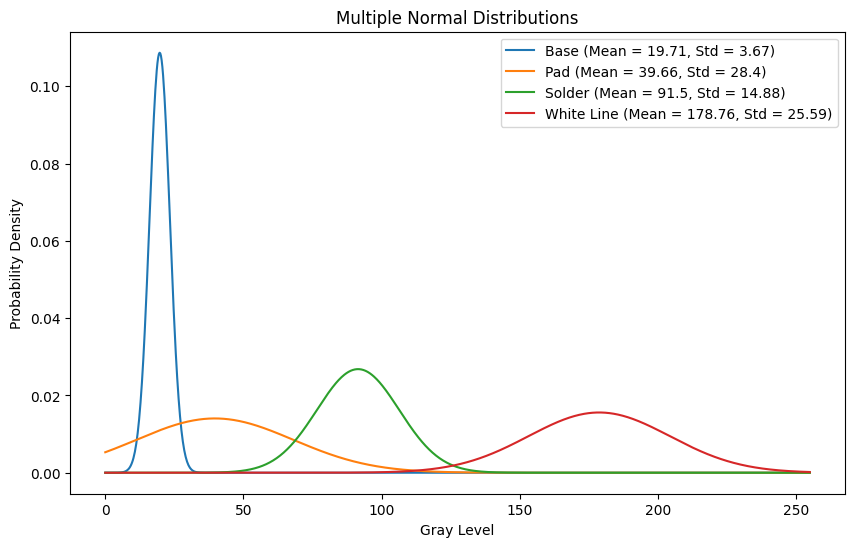

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 這是四組的平均值和標準差
mean_std_pairs = [
    (19.71, 3.67),  # Base
    (39.66, 28.40),  # Pad
    (91.50, 14.88),  # Solder
    (178.76, 25.59)  # White Line
]

# 設定 X 軸範圍為 0 到 255（灰階範圍）
x = np.linspace(0, 255, 1000)

# 繪製四組常態分佈曲線
plt.figure(figsize=(10, 6))

# 每組資料繪製一條曲線
labels = ['Base', 'Pad', 'Solder', 'White Line']
for (mean, std_dev), label in zip(mean_std_pairs, labels):
    y = norm.pdf(x, mean, std_dev)
    plt.plot(x, y, label=f'{label} (Mean = {mean}, Std = {std_dev})')

# 設定圖形標題與軸標籤
plt.title('Multiple Normal Distributions')
plt.xlabel('Gray Level')
plt.ylabel('Probability Density')
plt.legend()  # 顯示圖例
plt.show()


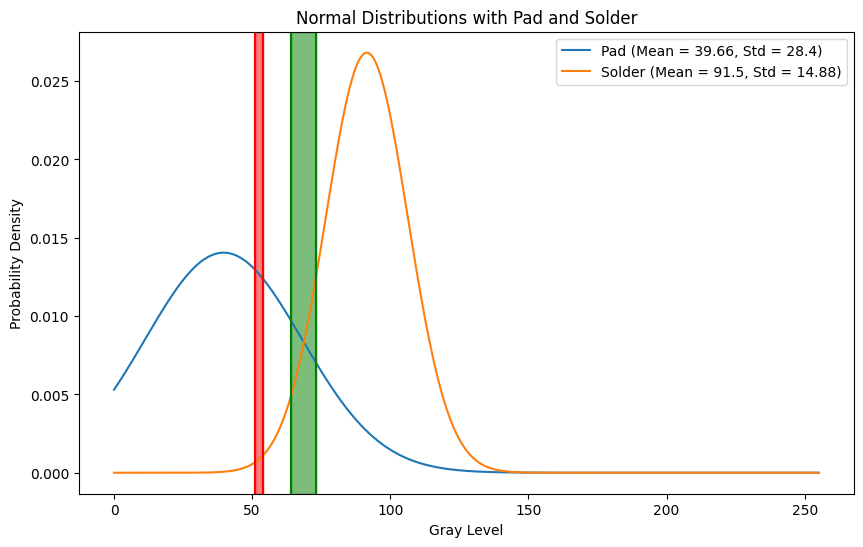

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 這是Pad和Solder的平均值和標準差
mean_std_pairs = [
    (39.66, 28.40),  # Pad
    (91.50, 14.88),  # Solder
]

# 設定 X 軸範圍為 0 到 255（灰階範圍）
x = np.linspace(0, 255, 1000)

# 繪製兩組常態分佈曲線
plt.figure(figsize=(10, 6))

# 每組資料繪製一條曲線
labels = ['Pad', 'Solder']
for (mean, std_dev), label in zip(mean_std_pairs, labels):
    y = norm.pdf(x, mean, std_dev)
    plt.plot(x, y, label=f'{label} (Mean = {mean}, Std = {std_dev})')

    # # 填充 68%, 95%, 99.7% 區間 (避免重疊)
    # # 68% 區間（Mean ± 1 Std Dev）
    # plt.fill_between(x, y, where=((x >= mean - std_dev) & (x <= mean + std_dev)), color='red', alpha=0.3)
    
    # # 95% 區間（Mean ± 2 Std Dev），填充在 68%-95% 區間
    # plt.fill_between(x, y, where=((x >= mean - 2 * std_dev) & (x < mean - std_dev)) | 
    #                  ((x > mean + std_dev) & (x <= mean + 2 * std_dev)), 
    #                  color='green', alpha=0.3)
    
    # # 99.7% 區間（Mean ± 3 Std Dev），填充在 95%-99.7% 區間
    # plt.fill_between(x, y, where=((x >= mean - 3 * std_dev) & (x < mean - 2 * std_dev)) | 
    #                  ((x > mean + 2 * std_dev) & (x <= mean + 3 * std_dev)),
    #                  color='blue', alpha=0.3)

    # 51-54 線段區間
    plt.axvline(x=51, color='red', linestyle='-')
    plt.axvline(x=54, color='red', linestyle='-')
    # 51-54 填充區間
    plt.axvspan(51, 54, color='red', alpha=0.3)

    # 64-73 線段區間
    plt.axvline(x=64, color='green', linestyle='-')
    plt.axvline(x=73, color='green', linestyle='-')
    # 64-73 填充區間
    plt.axvspan(64, 73, color='green', alpha=0.3)

# 設定圖形標題與軸標籤
plt.title('Normal Distributions with Pad and Solder')
plt.xlabel('Gray Level')
plt.ylabel('Probability Density')

# 顯示圖例
plt.legend(loc='upper right')

plt.show()
